# Part 2 ) Spatial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cw_functions import *

In [2]:
###--- Import spatial data ---###

### Read in the data
df = pd.read_csv('cw_data.csv')

### Generate the arrays needed from the dataframe
c = np.array(df["bicycle.theft"])
xi = np.array(df['xi'])
yi = np.array(df['yi'])
N = len(c)
coords = [(xi[i],yi[i]) for i in range(N)]

### Subsample the original data set
subsample_factor = 3
idx = subsample(N, subsample_factor, seed=42)
G = get_G(N,idx)
data = G @ c



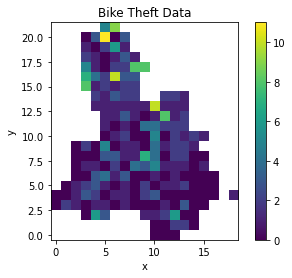

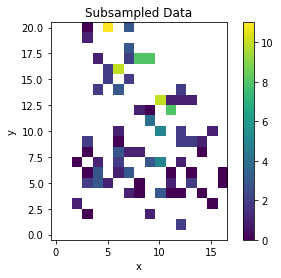

In [16]:
### Plotting examples
plot_2D_unlimited(c, xi, yi, title='Bike Theft Data')                   # Plot bike theft count data
plot_2D_unlimited(data, xi[idx], yi[idx], title='Subsampled Data')      # Plot subsampled data

## pCN predictions

In [4]:
###--- MCMC ---####

### Set MCMC parameters
l = 2
n = 10000
beta = 0.2

np.random.seed(0)
C = GaussianKernel(coords, l)
Cc = np.linalg.cholesky(C + 1e-6 * np.eye(N))
z = np.random.randn(N)
u0 = Cc @ z

In [5]:
pcn_X, pcn_accept = pcn(log_likelihood=log_poisson_likelihood, u0=u0, y=data, K=C, G=G, n_iters=n, beta=beta)
print("\n acceptance ratio: {}".format(pcn_accept))

Performing pCN...
100%|██████████| 10000/10000 [00:03<00:00, 2686.25it/s]
 acceptance ratio: 0.264



In [7]:
theta_samples = np.exp(pcn_X)
theta_estimate = np.mean(theta_samples, axis=0)


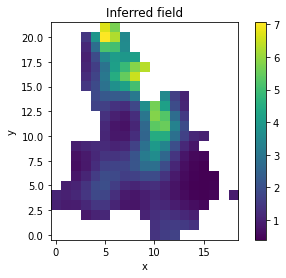

In [17]:
plot_2D_unlimited(theta_estimate, xi, yi, title='Inferred field')                   # Plot bike theft count data

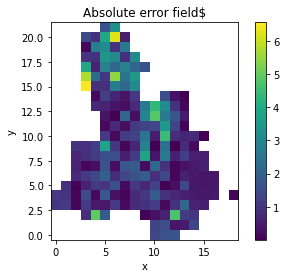

In [18]:
error = np.abs(theta_estimate - c)
plot_2D_unlimited(error, xi, yi, title='Absolute error field$')

In [19]:
mean_abs_err = np.mean(error)
print(mean_abs_err)

1.330727930324698


In [ ]:
def compute_abs_error(l, n):
    beta = 0.2

    np.random.seed(0)
    C = GaussianKernel(coords, l)
    Cc = np.linalg.cholesky(C + 1e-6 * np.eye(N))
    z = np.random.randn(N)
    u0 = Cc @ z

    pcn_X, pcn_accept = pcn(log_likelihood=log_poisson_likelihood, u0=u0, y=data, K=C, G=G, n_iters=n, beta=beta)

    theta_samples = np.exp(pcn_X)
    theta_estimate = np.mean(theta_samples, axis=0)